In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.110131,-0.312085,1
117952,-0.909962,-0.030202,1
42613,0.676380,0.007396,1
43567,0.011208,0.209975,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,0.019330,0.088962,1
54412,-0.072284,0.288664,1
50632,0.259571,-0.293184,1
89251,0.010883,-0.042324,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 3s 17us/step - loss: 0.1168 - accuracy: 0.5797 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 2s 11us/step - loss: 0.0131 - accuracy: 0.7777 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 2s 10us/step - loss: 0.0108 - accuracy: 0.7797 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0094 - accuracy: 0.7857 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0083 - accuracy: 0.7946 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 2s 10us/step - loss: 0.0071 - accuracy: 0.8041 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [========================

174463/174463 [==============================] - 2s 10us/step - loss: 0.0023 - accuracy: 0.8928 - val_loss: 4.4886e-04 - val_accuracy: 1.0000
Epoch 55/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0023 - accuracy: 0.8922 - val_loss: 4.1527e-04 - val_accuracy: 1.0000
Epoch 56/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0023 - accuracy: 0.8932 - val_loss: 3.8682e-04 - val_accuracy: 1.0000
Epoch 57/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0023 - accuracy: 0.8919 - val_loss: 4.3105e-04 - val_accuracy: 1.0000
Epoch 58/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0023 - accuracy: 0.8945 - val_loss: 4.4402e-04 - val_accuracy: 1.0000
Epoch 59/100
174463/174463 [==============================] - 2s 9us/step - loss: 0.0023 - accuracy: 0.8943 - val_loss: 4.4650e-04 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 2s 10us/step - loss: 0.002

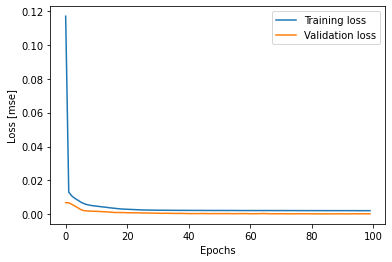

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

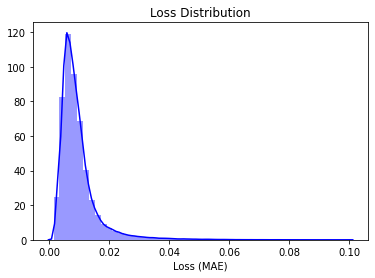

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.009472835516744901

Text(0, 0.5, 'Loss (MAE)')

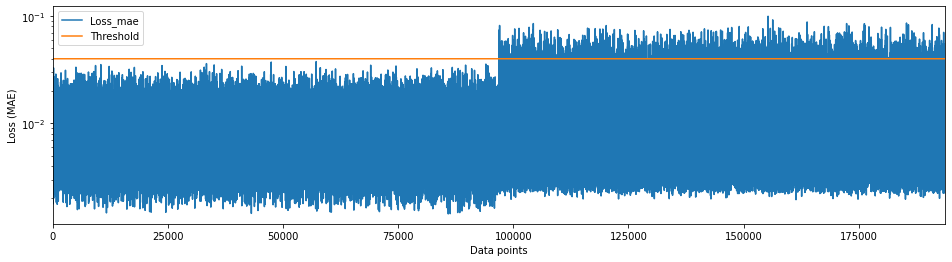

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.007237,0.04,False
1,0.014035,0.04,False
2,0.008524,0.04,False
3,0.007753,0.04,False
4,0.006472,0.04,False
...,...,...,...
193843,0.012889,0.04,False
193844,0.024546,0.04,False
193845,0.014125,0.04,False
193846,0.004551,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96942   0.062043       0.04     True
96957   0.074328       0.04     True
97034   0.081647       0.04     True
97081   0.041097       0.04     True
97180   0.051726       0.04     True
...          ...        ...      ...
193452  0.070449       0.04     True
193503  0.051544       0.04     True
193550  0.054865       0.04     True
193607  0.045948       0.04     True
193780  0.045385       0.04     True

[1603 rows x 3 columns]
(1603, 3)


In [ ]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [ ]:
pred_test = model.predict(test)

In [ ]:
score = model.evaluate(test,test)
score

In [ ]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

In [ ]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [ ]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

In [ ]:
scored_test['Loss_mae'].mean()

In [ ]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [ ]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

In [ ]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [ ]:
print(score[1])

In [ ]:
print("Accuracy: {:.2f}%".format(score[1]*100))

In [ ]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))